# Bike Sharing 

## Citation 

**Boom** **Bikes**

Dataset link : https://www.kaggle.com/datasets/yasserh/bike-sharing-dataset


In [426]:
# Importing Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [427]:
# warnings 
import warnings 
warnings.filterwarnings("ignore")

## 1. Data Understanding & Exploration 

In [428]:
# Loading Dataset 
df = pd.read_csv("/kaggle/input/bike-sharing-dataset/day.csv")

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [429]:
# Shape 
df.shape

(730, 16)

In [430]:
# Columns in dataset 
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [431]:
# Info
df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 133.4 KB


In [432]:
# Statistical Summary 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [433]:
# Null Value Analysis 

df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [434]:
# Converting " dteday " object ---> datetime
df["dteday"] = df["dteday"].astype("datetime64[ns]")

In [435]:
# Decoding "season"

# 1 - Spring
# 2 - Summer 
# 3 - Fall 
# 4 - Winter 

df["season"] = df["season"].map({
    1:"spring", 
    2:"summer",
    3:"fall",
    4:"winter"
})


In [436]:
df["season"].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [437]:
# 0 - 2018  , 1 - 2019 -- Year
df["yr"].value_counts() , df["mnth"].value_counts()

(yr
 0    365
 1    365
 Name: count, dtype: int64,
 mnth
 1     62
 3     62
 5     62
 7     62
 8     62
 10    62
 12    62
 4     60
 6     60
 9     60
 11    60
 2     56
 Name: count, dtype: int64)

In [438]:
# Decoding months 
df["mnth"] = df["mnth"].map({
    1:"Jan",
    2:"Feb",
    3:"Mar",
    4:"Apr",
    5:"May",
    6:"Jun",
    7:"Jul",
    8:"Aug",
    9:"Sept",
    10:"Oct",
    11:"Nov",
    12:"Dec"
})

In [439]:
df["mnth"].value_counts()

mnth
Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: count, dtype: int64

In [440]:
# Holidays 
df["holiday"].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [441]:
# Week Day 
df["weekday"] = df["weekday"].map({
    0:"Mon",
    1:"Tue",
    2:"Wed",
    3:"Thurs",
    4:"Fri",
    5:"Sat",
    6:"Sun"
})

In [442]:
df["weekday"].value_counts()

weekday
Sun      105
Mon      105
Tue      105
Wed      104
Fri      104
Sat      104
Thurs    103
Name: count, dtype: int64

In [443]:
# Working Day
# df["workingday"].astype("category").value_counts()
df["workingday"].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [444]:
# weathersit

# 1 - Clear , Few Clouds , Partly Cloudy 
# 2 - Mist , Cloudy 
# 3 - Light Snow , Heavy Rain 

df["weathersit"] = df["weathersit"].map({
    1:"A", 
    2:"B",
    3:"C"
})



In [445]:
df["weathersit"].value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

## 2. Data Visualization 

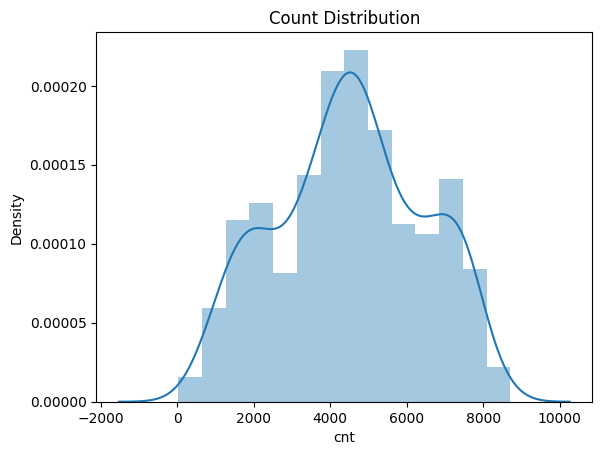

In [447]:
# Target variable analysis 
sns.distplot(df["cnt"])
plt.title("Count Distribution")
plt.show()

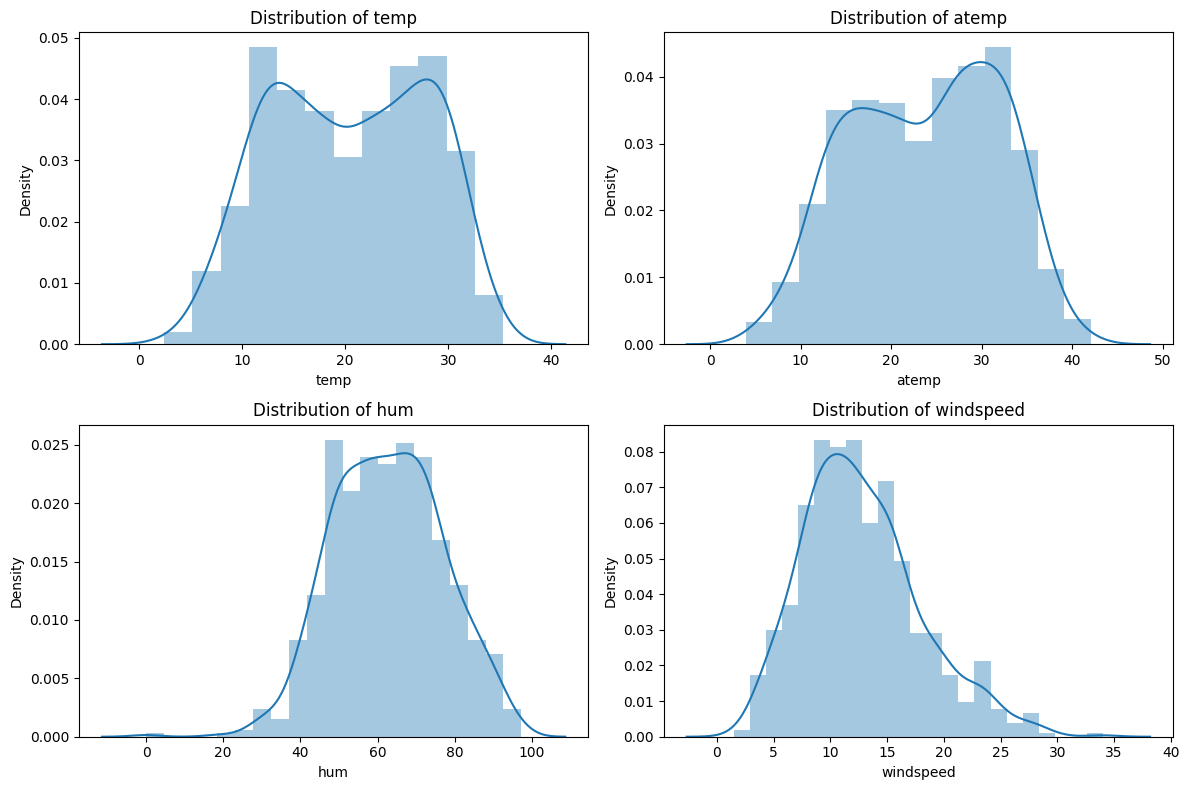

In [448]:
# Distribution of Temp , atemp , hum , windspeed
plt.figure(figsize = (12 , 8 ) )
for i , col in enumerate(["temp" , "atemp" , "hum" , "windspeed"] , 1): 
    plt.subplot(2 , 2 , i)
    sns.distplot(df[col])
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [449]:
categorical_df =['season', 'mnth', 'weekday', 'weathersit' , 
                 'workingday' , 'yr' , 'holiday']


categorical_df

['season', 'mnth', 'weekday', 'weathersit', 'workingday', 'yr', 'holiday']

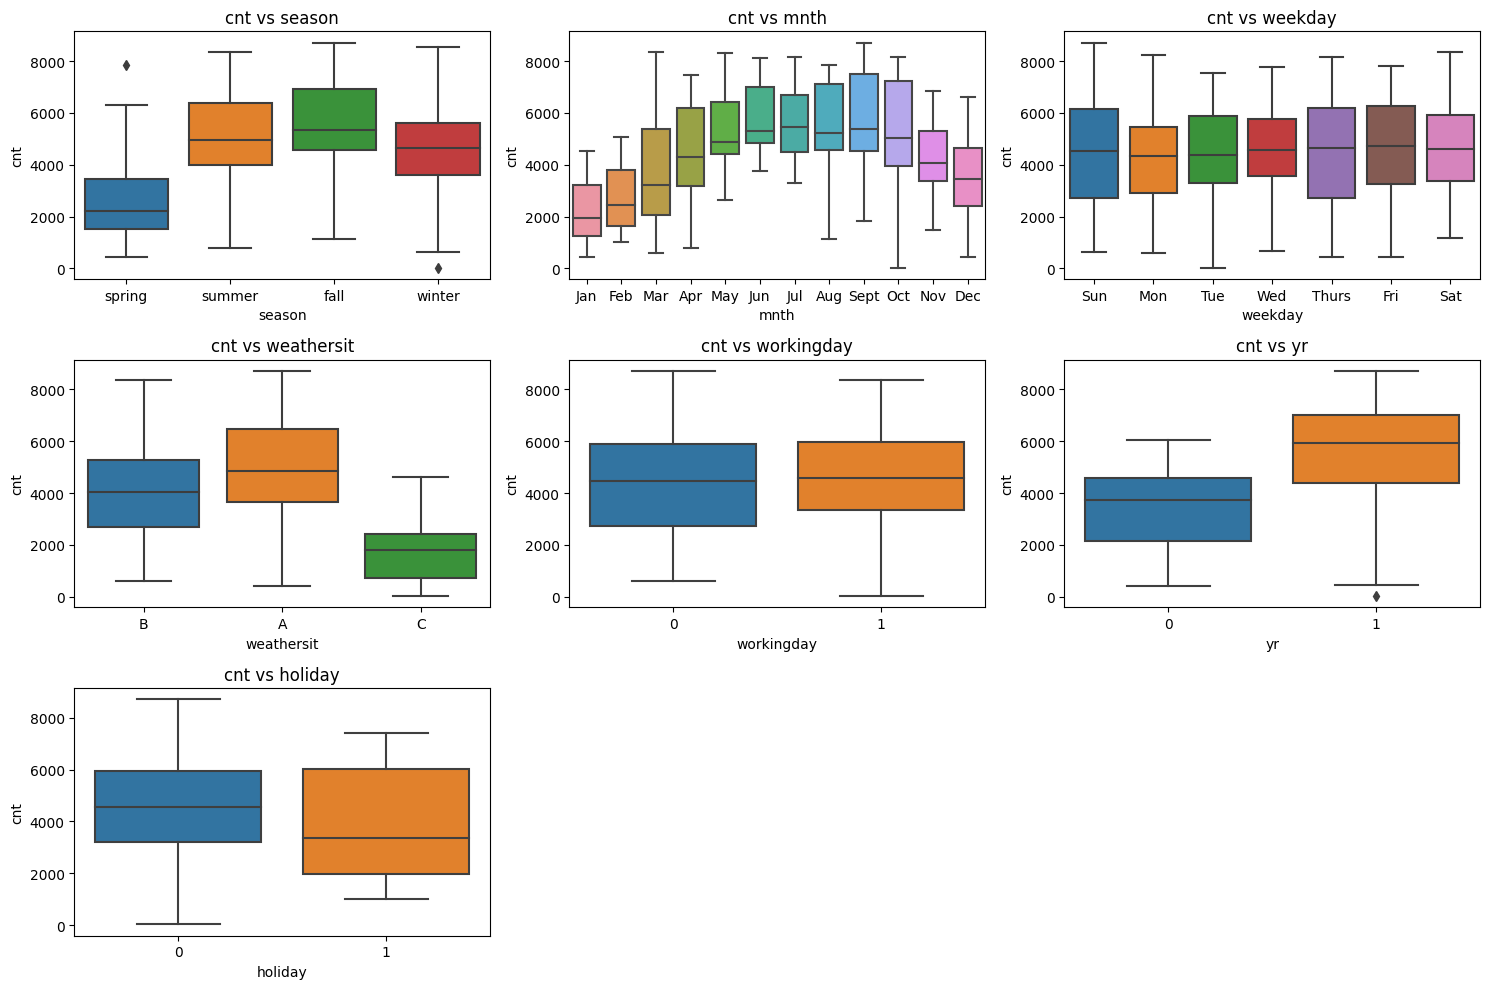

In [450]:
# Bivariate Analysis with target variable 
plt.figure(figsize = (15, 10 ))
for i , col in enumerate(categorical_df , 1 ):
    plt.subplot(3 , 3 , i)
    sns.boxplot(x = col , y = "cnt" , data = df)
    plt.title(f"cnt vs {col}")
plt.tight_layout()
plt.show()

In [451]:
# changing in for correlation 
for col in ["casual" , "registered" , "cnt"]:
    df[col] = df[col].astype("float64")

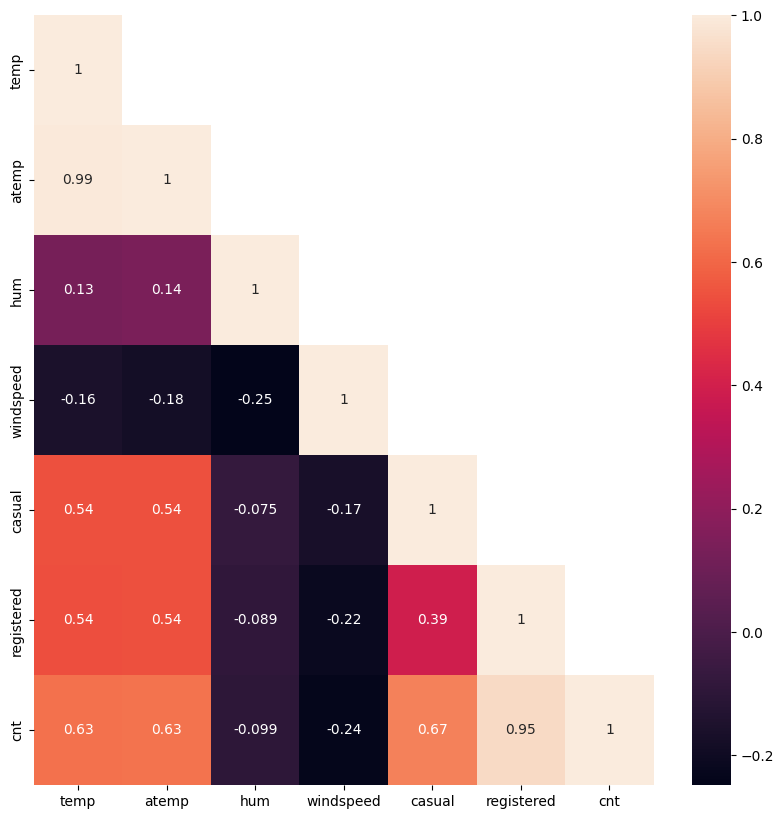

In [452]:
# correlation matrix 
corr = df.select_dtypes(include= ["float64"]).corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False 
plt.figure(figsize = (10 , 10 ))
sns.heatmap( corr ,mask = mask , annot  = True, vmax = 1)
plt.show()

## 3. Data Preparation 

In [453]:
# dropping features
df.drop(columns = ["instant" , "atemp" , "dteday"] , inplace = True )

In [454]:
category =  ["season" , "mnth" , "weekday" , "weathersit"]
for col in category:
    df[col] = df[col].astype("category")
    
categorical_data = df.select_dtypes(include=["category"])

In [455]:
# One-Hot encoding
dummy_df = pd.get_dummies(categorical_data , drop_first = True)

dummy_df = (dummy_df == True).astype(int)

In [456]:
df = df.drop(category , axis = 1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


In [457]:
df = pd.concat([df , dummy_df] , axis = 1)


In [458]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,1,0,0,0,0
